In [45]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [2]:
# Reading the dataset
dataset = pd.read_csv('LoanTraining.csv')

In [3]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
# Getting the basic information about data
print(dataset.shape)
print(dataset.ndim)
print(dataset.columns)

(614, 13)
2
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [7]:
# A brief information about dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Handling the null values

In [8]:
dataset.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
dataset.dropna(inplace = True)

In [10]:
dataset.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
# Copy of our original dataset
copy_dataset = dataset

In [13]:
# Number of approved loan status
dataset['Loan_Status'].value_counts()

Y    332
N    148
Name: Loan_Status, dtype: int64

In [14]:
# Statistical Description of dataset
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


## Handling the outliers

In [19]:
# Function to handle outliers
def cap_outliers(dataset, column):
     lower_limit = dataset[column].quantile(0.01)
     upper_limit = dataset[column].quantile(0.99)
     dataset[column] = np.where(dataset[column] < lower_limit, lower_limit, dataset[column])
     dataset[column] = np.where(dataset[column] > upper_limit, upper_limit, dataset[column])

In [20]:
columns_to_cap = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
for column in columns_to_cap:
    cap_outliers(dataset, column)

In [23]:
# Handling 'Loan_Amount_Term' outliers directly since Q1 and Q3 are the same
dataset['Loan_Amount_Term'] = np.where(dataset['Loan_Amount_Term'] < 360, 360, dataset['Loan_Amount_Term'])
dataset['Loan_Amount_Term'] = np.where(dataset['Loan_Amount_Term'] > 360, 360, dataset['Loan_Amount_Term'])
# Handling 'Credit_History' outliers directly since Q1 and Q3 are the same
dataset['Credit_History'] = np.where(dataset['Credit_History'] == 0, 1, dataset['Credit_History'])                                                        

In [24]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.0,480.0
mean,5127.638958,1478.765250,144.222604,360.0,1.0
std,3820.305002,1873.440515,77.311298,0.0,0.0
min,1361.410000,0.000000,29.160000,360.0,1.0
25%,2898.750000,0.000000,100.000000,360.0,1.0
50%,3859.000000,1084.500000,128.000000,360.0,1.0
75%,5852.500000,2253.250000,170.000000,360.0,1.0
max,23091.730000,9397.480000,495.210000,360.0,1.0


In [25]:
# Creating a new column total income
dataset['TotalIncome'] = dataset['ApplicantIncome'] + dataset['CoapplicantIncome']

In [26]:
dataset.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'TotalIncome'],
      dtype='object')

## Visualization of dataset

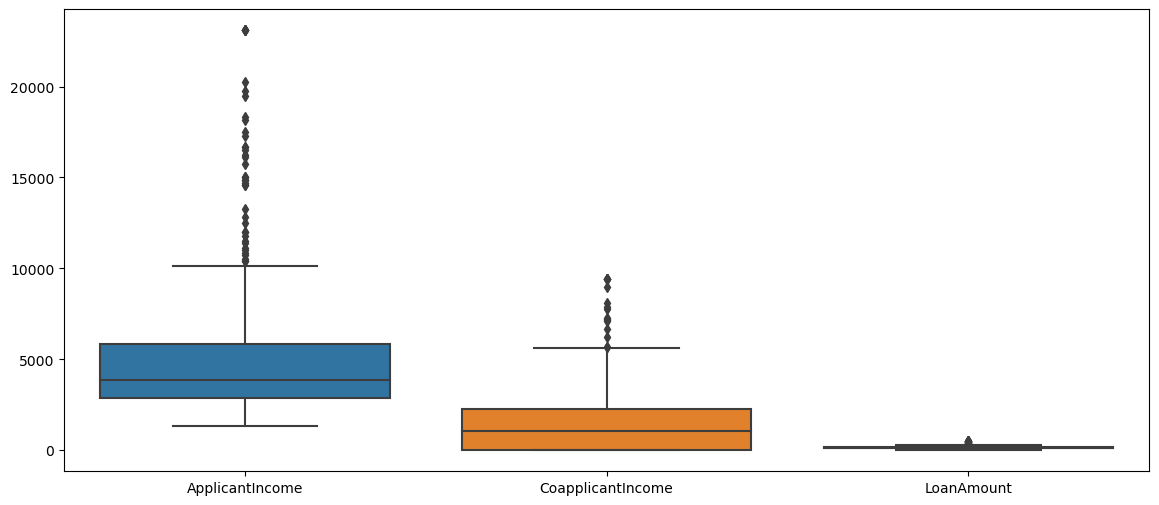

In [29]:
# Boxplot to identify outliers in dataset
plt.figure(figsize=(14, 6))
sns.boxplot(data=dataset[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']])
plt.show()

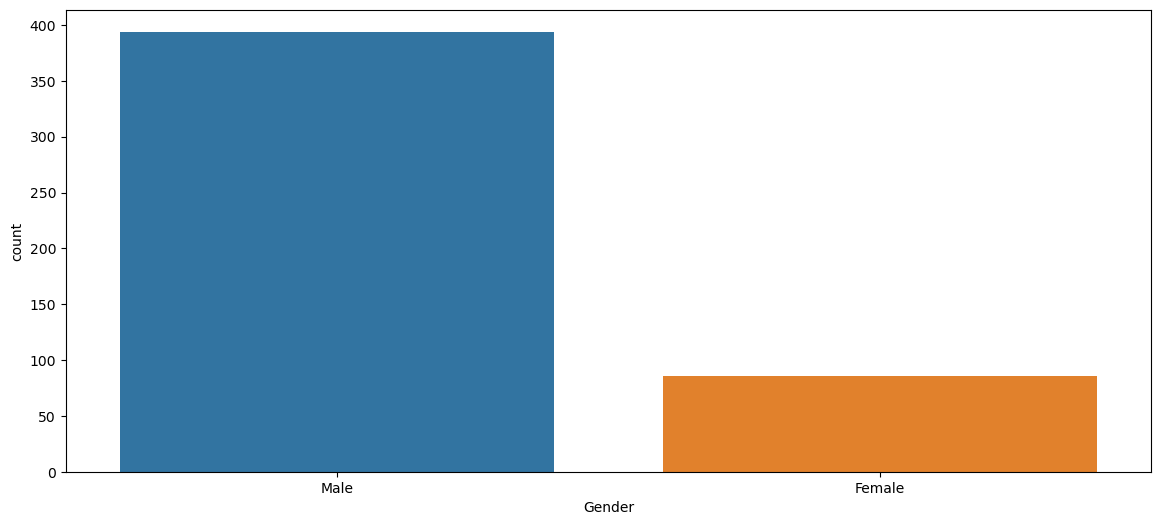

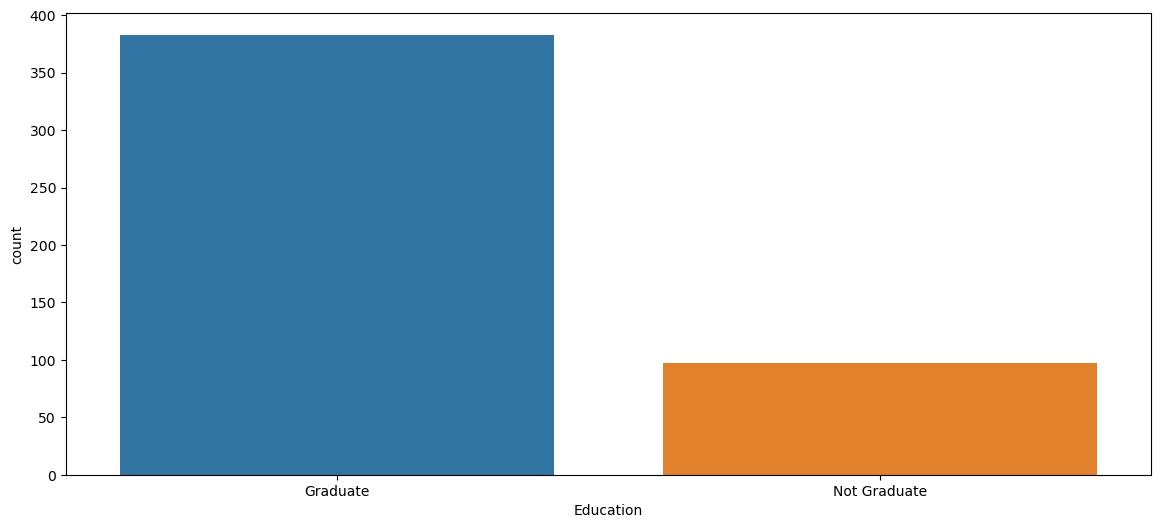

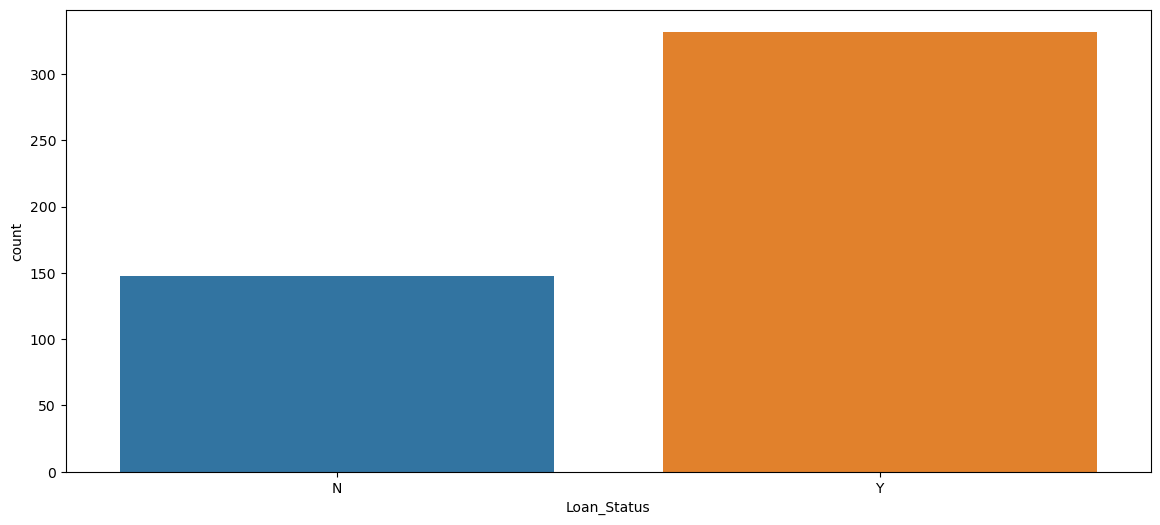

In [32]:
# Frequency of a categorical features 

# 1. Gender
plt.figure(figsize = (14, 6))
sns.countplot(x = 'Gender', data = dataset)
plt.show()

# 2. Education
plt.figure(figsize=(14, 6))
sns.countplot(x = 'Education', data = dataset)
plt.show()

# 3. Loan Status
plt.figure(figsize=(14, 6))
sns.countplot(x = 'Loan_Status', data = dataset)
plt.show()

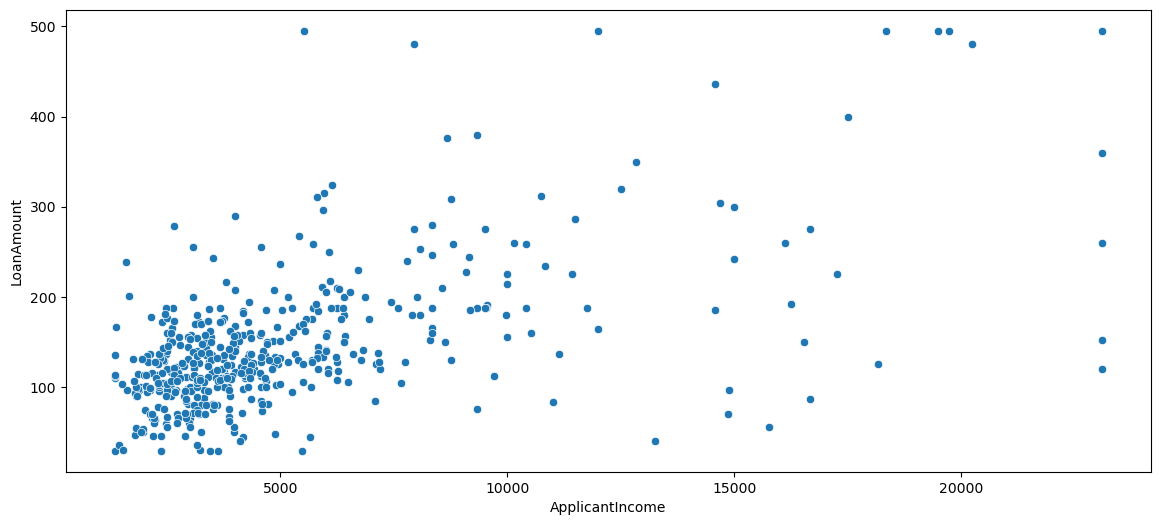

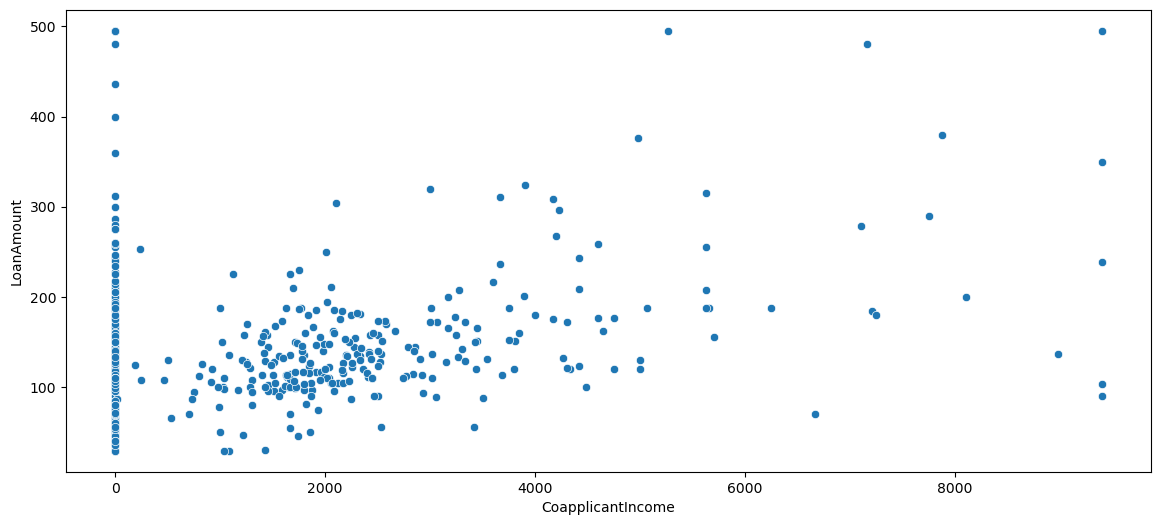

In [33]:
# Plots to show relation between numerical features
plt.figure(figsize=(14, 6))
sns.scatterplot(x = 'ApplicantIncome', y = 'LoanAmount', data = dataset)
plt.show()

plt.figure(figsize=(14, 6))
sns.scatterplot(x = 'CoapplicantIncome', y = 'LoanAmount', data = dataset)
plt.show()

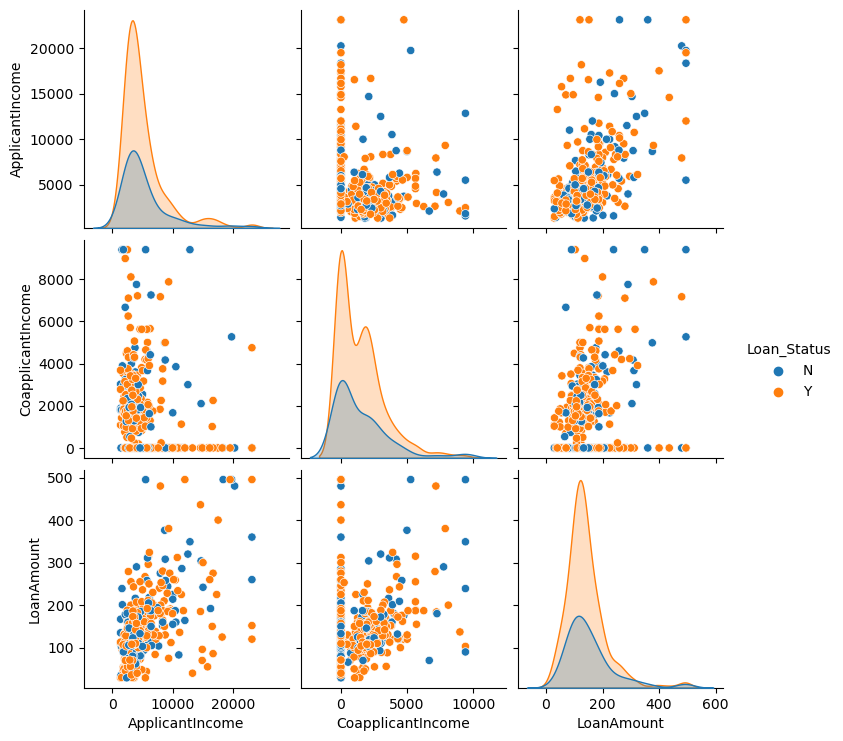

In [35]:
# Pair Plot
sns.pairplot(dataset[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Status']], hue='Loan_Status')
plt.show()

## Training our models

In [40]:
# Encoding our categorical variables
label_encoder = {}
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for col in categorical_columns:
    label_encoder[col] = LabelEncoder()
    dataset[col] = label_encoder[col].fit_transform(dataset[col])

In [42]:
# Dropping the columns not required to train the model
dataset = dataset.drop(columns = ['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome'], axis = 1)

In [43]:
# Splitting and training our data
X = dataset.drop('Loan_Status', axis = 1)
y = dataset['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [44]:
# Scaling numerical features
scaler = StandardScaler()
numerical_columns = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'TotalIncome']
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

In [46]:
# Training models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(probability=True),
    'k-NN': KNeighborsClassifier()
}
# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    if y_proba is not None:
        print(f"ROC-AUC: {roc_auc_score(y_test, y_proba)}")
    print("-" * 30)

Model: Logistic Regression
Accuracy: 0.6979166666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.04      0.06        28
           1       0.71      0.97      0.82        68

    accuracy                           0.70        96
   macro avg       0.52      0.50      0.44        96
weighted avg       0.60      0.70      0.60        96

ROC-AUC: 0.6165966386554622
------------------------------
Model: Decision Tree
Accuracy: 0.5
Classification Report:
              precision    recall  f1-score   support

           0       0.19      0.21      0.20        28
           1       0.66      0.62      0.64        68

    accuracy                           0.50        96
   macro avg       0.42      0.42      0.42        96
weighted avg       0.52      0.50      0.51        96

ROC-AUC: 0.41596638655462187
------------------------------
Model: Random Forest
Accuracy: 0.65625
Classification Report:
              precision    r

In [51]:
import joblib

# Save the best model (e.g., RandomForestClassifier)
best_model = SVC(probability = True)
best_model.fit(X_train, y_train)
joblib.dump(best_model, 'best_model.pkl')

# Load the saved model
loaded_model = joblib.load('best_model.pkl')

In [52]:
new_data = pd.DataFrame({
    'Gender': ['Male'],
    'Married': ['Yes'],
    'Dependents': ['0'],
    'Education': ['Graduate'],
    'Self_Employed': ['No'],
    'LoanAmount': [100],
    'Loan_Amount_Term': [360],
    'Credit_History': [1.0],
    'Property_Area': ['Urban'],
    'TotalIncome': [5000]
})

# Encode categorical variables
for col in categorical_columns:
    if col in new_data.columns:
        new_data[col] = label_encoder[col].transform(new_data[col])

# Scale numerical features
new_data[numerical_columns] = scaler.transform(new_data[numerical_columns])

# Predict using the loaded model
prediction = loaded_model.predict(new_data)
prediction_proba = loaded_model.predict_proba(new_data)[:, 1] if hasattr(loaded_model, 'predict_proba') else None

# Map back the prediction to the original label
predicted_label = label_encoder['Loan_Status'].inverse_transform(prediction)

print(f"Predicted Loan Status: {predicted_label[0]}")
if prediction_proba is not None:
    print(f"Prediction Probability: {prediction_proba[0]:.2f}")

Predicted Loan Status: Y
Prediction Probability: 0.70
